In [24]:
import os
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline

### Loading the data

In [2]:
base_dir = 'D:/DataScience/DataSets/cats_and_dogs_filtered/'

In [3]:
train_dir = os.path.join(base_dir,'train/')
val_dir = os.path.join(base_dir,'validation/')

In [4]:
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(val_dir, 'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs')

In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


### Data Preprocessing : ImageAugmentation

In [8]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


### Building the Model 

In [13]:
model = tf.keras.models.Sequential()

In [14]:
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [15]:
# Flatten the results to feed into a DNN
model.add(tf.keras.layers.Flatten())
# 512 neuron hidden layer
model.add(tf.keras.layers.Dense(512, activation='relu'))

In [16]:
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

### Training the Model

In [20]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 43s - loss: 0.5727 - accuracy: 0.6925 - val_loss: 0.5306 - val_accuracy: 0.7280
Epoch 2/15
100/100 - 43s - loss: 0.5750 - accuracy: 0.7030 - val_loss: 0.5192 - val_accuracy: 0.7380
Epoch 3/15
100/100 - 44s - loss: 0.5594 - accuracy: 0.7350 - val_loss: 0.5359 - val_accuracy: 0.7330
Epoch 4/15
100/100 - 46s - loss: 0.5487 - accuracy: 0.7265 - val_loss: 0.5664 - val_accuracy: 0.6980
Epoch 5/15
100/100 - 44s - loss: 0.5673 - accuracy: 0.7120 - val_loss: 0.5344 - val_accuracy: 0.7160
Epoch 6/15
100/100 - 43s - loss: 0.5548 - accuracy: 0.7210 - val_loss: 0.5913 - val_accuracy: 0.7120
Epoch 7/15
100/100 - 40s - loss: 0.5461 - accuracy: 0.7295 - val_loss: 0.5538 - val_accuracy: 0.7220
Epoch 8/15
100/100 - 44s - loss: 0.5469 - accuracy: 0.7265 - val_loss: 0.4909 - val_accuracy: 0.7690
Epoch 9/15
100/100 - 40s - loss: 0.5504 - accuracy: 0.7290 - val_loss: 0.5402 - val_accuracy: 0.722

### Ploting the Curve

In [21]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

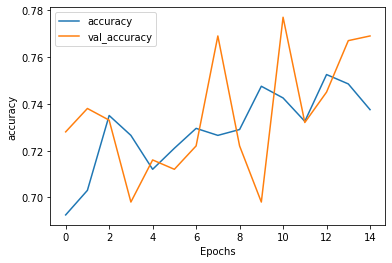

In [22]:
plot_graphs(history, 'accuracy')

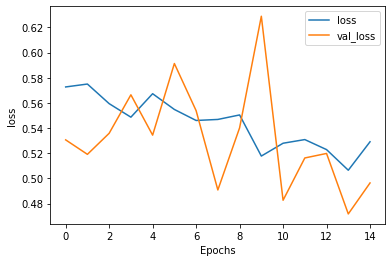

In [23]:
plot_graphs(history, 'loss')